In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from IPython.display import display, HTML
print("Setup Complete")

Setup Complete


# **Simple Meta Stock Price EDA**

This is a very simple and eaay EDA for the Stock Prices for META Ticker Symbol datset. Huge thanks for Muhammad Ibrahim Quasmi for creating and sharing this dataset.

**Load dataset**

Let's load the dataset and do a head.

In [2]:
data = pd.read_csv('/kaggle/input/stock-prices-for-meta-ticker-symbol/META_stock_data.csv')

data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2023-04-10 00:00:00-04:00,214.482434,215.431424,210.436723,214.522385,16106100,0.0,0.0
1,2023-04-11 00:00:00-04:00,215.251614,215.791050,213.183816,213.623352,16710100,0.0,0.0
2,2023-04-12 00:00:00-04:00,214.612284,216.610164,212.354685,213.773178,18972200,0.0,0.0
3,2023-04-13 00:00:00-04:00,215.501341,220.915595,215.461391,220.116455,23310400,0.0,0.0
4,2023-04-14 00:00:00-04:00,217.649075,221.874587,217.319423,221.255249,21591200,0.0,0.0


**Taking a quick look at the dataset**

Let's take a quick look at the dataset and find some of its properties.

In [3]:
data.shape

(251, 8)

In [4]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [5]:
data.describe

<bound method NDFrame.describe of                           Date        Open        High         Low  \
0    2023-04-10 00:00:00-04:00  214.482434  215.431424  210.436723   
1    2023-04-11 00:00:00-04:00  215.251614  215.791050  213.183816   
2    2023-04-12 00:00:00-04:00  214.612284  216.610164  212.354685   
3    2023-04-13 00:00:00-04:00  215.501341  220.915595  215.461391   
4    2023-04-14 00:00:00-04:00  217.649075  221.874587  217.319423   
..                         ...         ...         ...         ...   
246  2024-04-02 00:00:00-04:00  485.100006  497.529999  484.649994   
247  2024-04-03 00:00:00-04:00  498.929993  507.239990  498.750000   
248  2024-04-04 00:00:00-04:00  516.419983  530.000000  510.579987   
249  2024-04-05 00:00:00-04:00  516.859985  530.700012  514.409973   
250  2024-04-08 00:00:00-04:00  529.280029  531.489990  518.890015   

          Close    Volume  Dividends  Stock Splits  
0    214.522385  16106100        0.0           0.0  
1    213.623352  16

**Create a Scrolling Table**

Like always, I created a scrolling table to better visualize the data.

In [6]:
def scroll_table(df, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:200px; overflow:auto;">'
    html += df.to_html()
    html += '</div>'
    return html

In [7]:
def make_data_table(dataset, title):
    graph = dataset.select_dtypes(include=[np.number])
    info_graph = scroll_table(dataset, 'graph_data_2', title)
    display(HTML(info_graph))
    return make_data_table

make_data_table(data, 'Data')

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2023-04-10 00:00:00-04:00,214.482434,215.431424,210.436723,214.522385,16106100,0.0,0.0
1,2023-04-11 00:00:00-04:00,215.251614,215.791050,213.183816,213.623352,16710100,0.0,0.0
2,2023-04-12 00:00:00-04:00,214.612284,216.610164,212.354685,213.773178,18972200,0.0,0.0
3,2023-04-13 00:00:00-04:00,215.501341,220.915595,215.461391,220.116455,23310400,0.0,0.0
4,2023-04-14 00:00:00-04:00,217.649075,221.874587,217.319423,221.255249,21591200,0.0,0.0
5,2023-04-17 00:00:00-04:00,219.557043,220.745785,216.899874,218.628036,15481900,0.0,0.0
6,2023-04-18 00:00:00-04:00,219.676921,220.206358,215.980846,217.659058,12281000,0.0,0.0
7,2023-04-19 00:00:00-04:00,213.243742,217.099652,212.704306,215.471375,15898100,0.0,0.0
8,2023-04-20 00:00:00-04:00,213.253731,216.520270,212.544492,212.844177,16475400,0.0,0.0
9,2023-04-21 00:00:00-04:00,209.987200,213.183806,209.357863,212.664352,17717200,0.0,0.0


<function __main__.make_data_table(dataset, title)>

Let's take a look at the null values of the dataset.

In [8]:
null_val = data.isnull().sum()
html_null_val = scroll_table(null_val.to_frame(), 'null_val', 'Null values in Data')
display(HTML(html_null_val))

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Dividends,0
Stock Splits,0


As you see, there are no null values, which makes the dataset perfect for predictions and EDAs.

In [9]:
num_features = data.select_dtypes(include=[np.number])
summary = num_features.describe().T
num_html = scroll_table(summary, 'num_features', 'Summary Statistics for Dataset')

display(HTML(num_html))

,count,mean,std,min,25%,50%,75%,max
Open,251.0,3.347414e+02,8.224687e+01,2.099872e+02,2.879445e+02,3.128980e+02,3.573159e+02,5.292800e+02
High,251.0,3.392622e+02,8.321544e+01,2.110361e+02,2.918653e+02,3.167340e+02,3.599381e+02,5.314900e+02
Low,251.0,3.308398e+02,8.132886e+01,2.069105e+02,2.845980e+02,3.096015e+02,3.549584e+02,5.188900e+02
Close,251.0,3.351933e+02,8.223703e+01,2.073300e+02,2.876698e+02,3.123087e+02,3.576955e+02,5.273400e+02
Volume,251.0,2.048659e+07,9.818594e+06,5.467500e+06,1.540690e+07,1.854770e+07,2.222725e+07,8.461550e+07
Dividends,251.0,1.992032e-03,3.155972e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e-01
Stock Splits,251.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


**EDA**

Now let's do a simple EDA on this dataset. To start, let's make a lineplot to visualize all the changes of the columns, Open, High, Low, Close, Volume, and Dividends.

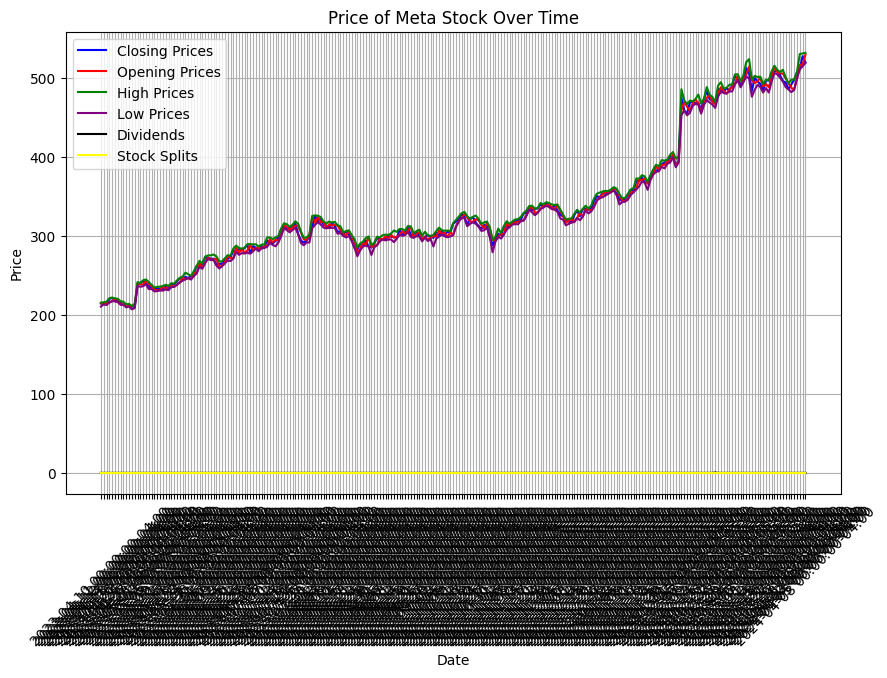

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'], color='blue', label = 'Closing Prices')
plt.plot(data['Date'], data['Open'], color='red', label = 'Opening Prices')
plt.plot(data['Date'], data['High'], color='green', label = 'High Prices')
plt.plot(data['Date'], data['Low'], color='purple', label = 'Low Prices')
plt.plot(data['Date'], data['Dividends'], color='black', label = 'Dividends')
plt.plot(data['Date'], data['Stock Splits'], color='yellow', label = 'Stock Splits')
plt.title('Price of Meta Stock Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

As you can see, the prices columns are plotted almost the same, just a bit different in some places. The stock splits and dividends both stay at 0, which signals stability on the stock market. Now, let's take a closer look at the volume change over time.

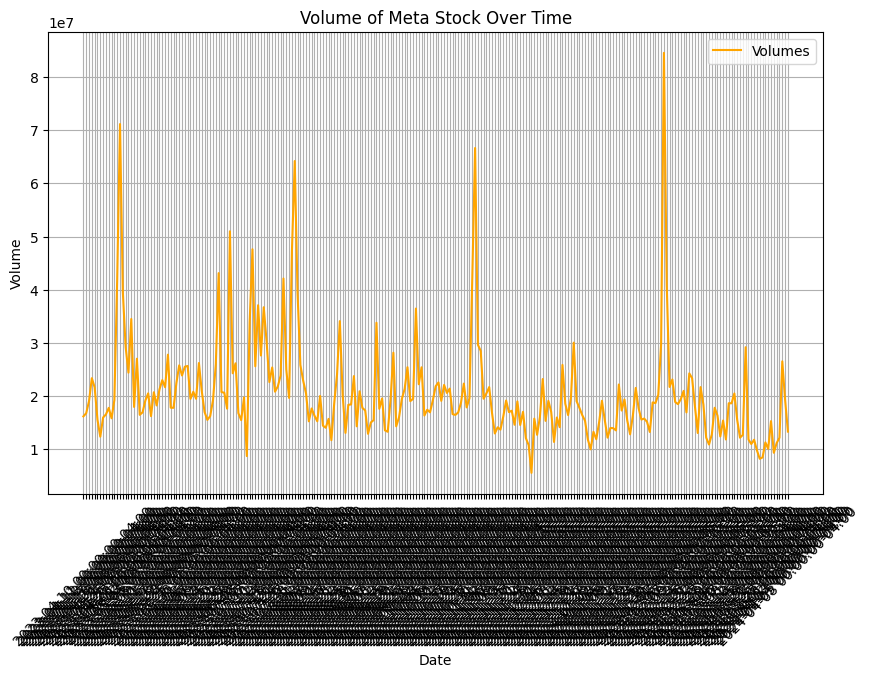

In [11]:
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data['Volume'], color='orange', label = 'Volumes')
plt.title('Volume of Meta Stock Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

The volume column has significant change over time. This shows that the stocks are very actively bought and sold on the market.

Now, lets take a look at all the prices of the columns summed up.

In [12]:
def calculate_total(data, columns_to_sum, left_column_name):
    """
    Calculate the total for each row based on specified columns and store them in a new DataFrame.
    
    Parameters:
        data (DataFrame): The dataset to extract values from.
        columns_to_sum (list): List of column names to extract values from.
        left_column_name (str): The name of the column to place on the left of the new DataFrame.
        
    Returns:
        DataFrame: A new DataFrame with the specified left column and the total of values from specified columns.
    """
    if not set(columns_to_sum).issubset(data.columns):
        raise ValueError("Some columns to sum are not present in the dataset.")
    
    total_values = data[columns_to_sum].sum(axis=1)
    
    new_data = pd.DataFrame({left_column_name: data[left_column_name], 'Total': total_values})
    
    return new_data

columns  = ['Open', 'High', 'Low', 'Close']
left_col = 'Date'

In [13]:
new_df = calculate_total(data, columns, left_col)

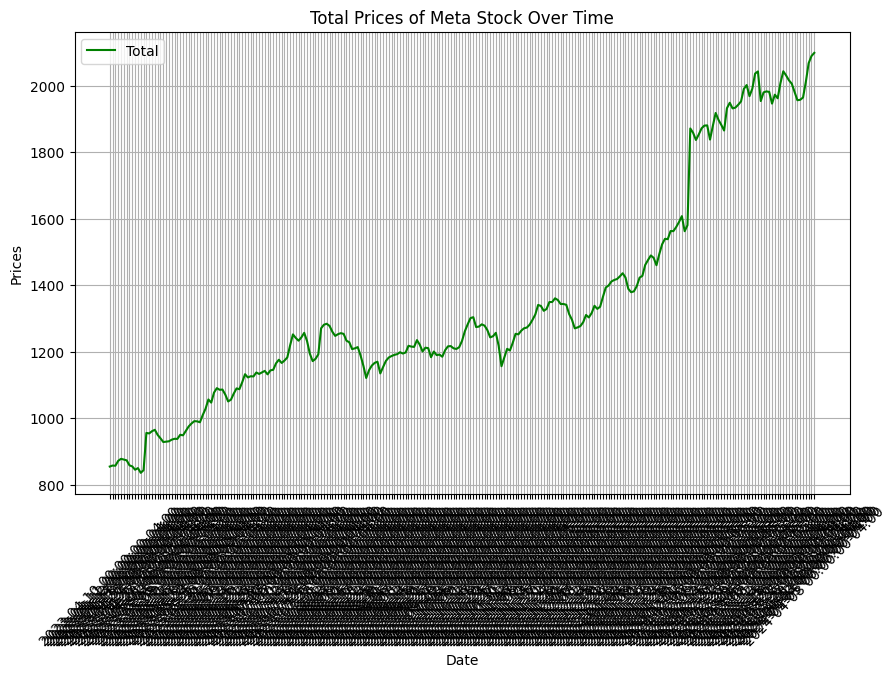

In [14]:
plt.figure(figsize=(10,6))
plt.plot(new_df['Date'], new_df['Total'], color='green', label = 'Total')
plt.title('Total Prices of Meta Stock Over Time')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

As you see, the plotted line has a form very similar to the the lines plotted on the previous line plot. Now, let's take a closer look at the individual price columns.

In [15]:
def make_hist(data, xlabel, ylabel, column, title, color):
    plt.figure(figsize=(10, 6))
    plt.hist(data[column], bins=20, color=color, edgecolor='black')
    plt.title(f"Histogram of {title}")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

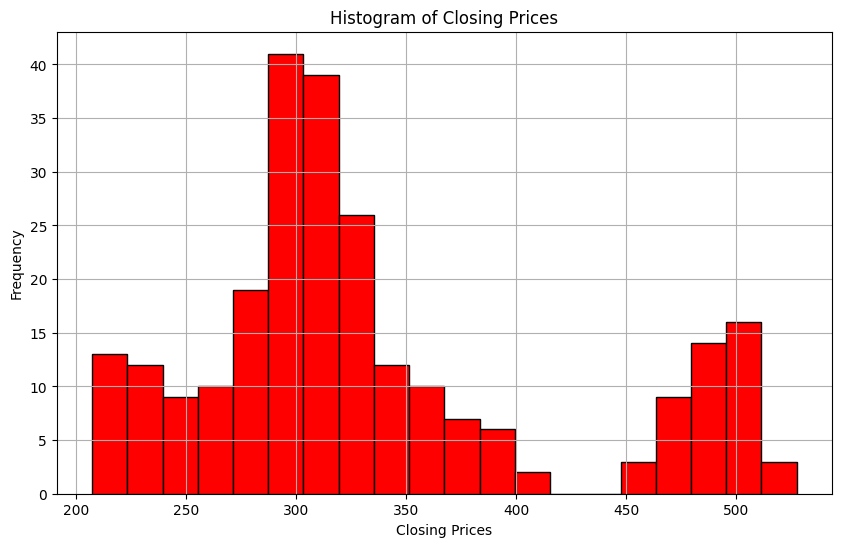

In [16]:
make_hist(data, 'Closing Prices', 'Frequency', 'Close', 'Closing Prices', 'red')

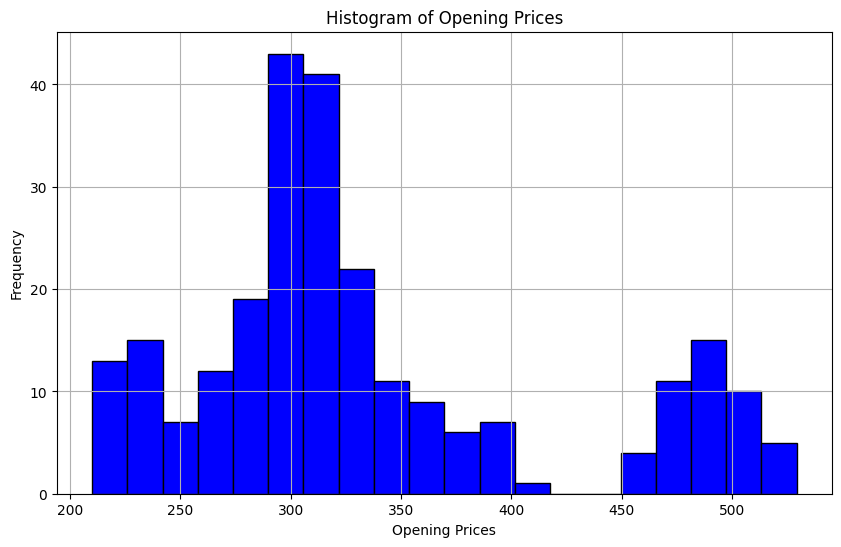

In [17]:
make_hist(data, 'Opening Prices', 'Frequency', 'Open', 'Opening Prices', 'blue')

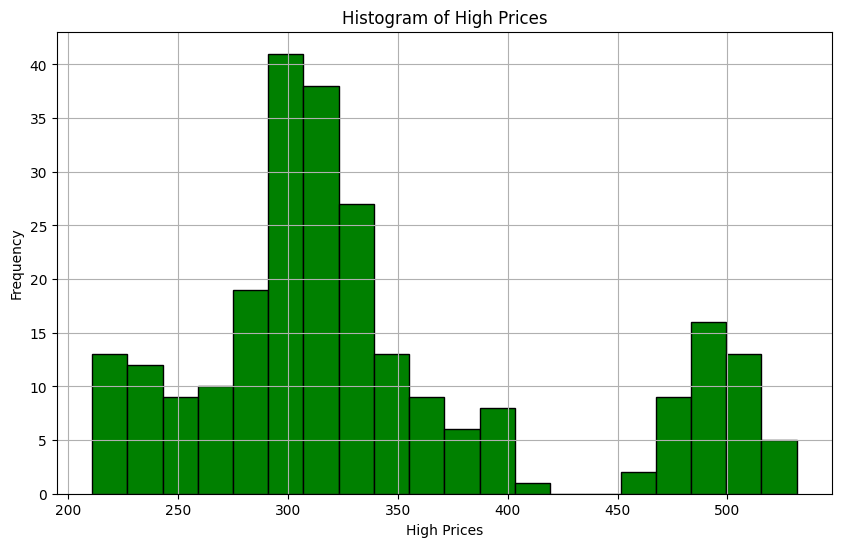

In [18]:
make_hist(data, 'High Prices', 'Frequency', 'High', 'High Prices', 'green')

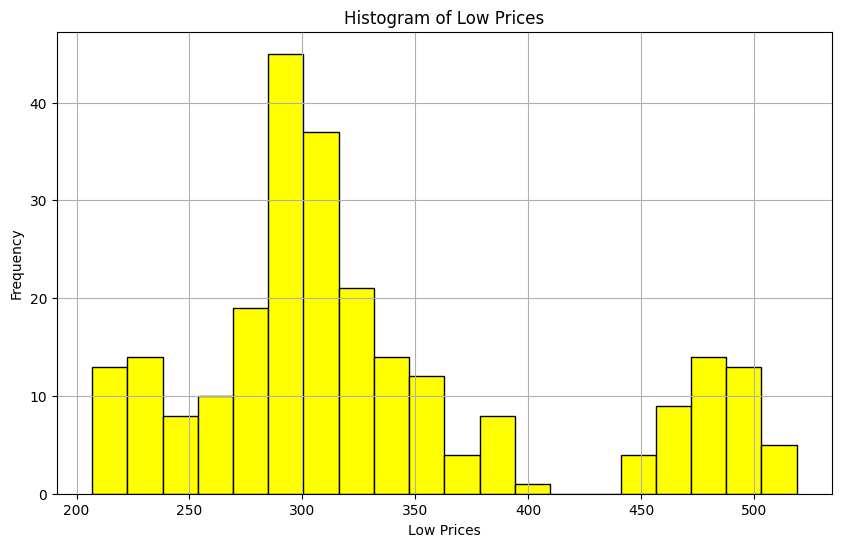

In [19]:
make_hist(data, 'Low Prices', 'Frequency', 'Low', 'Low Prices', 'yellow')

Even though these histograms may look the same, if you take a closer look they are actually different. I took a close look at these graphs, and I can infer that Meta's stock prices are very stable on the stock market. They have good pricing and trading volume, which gives Meta's good profit. 

**Output**

For a last step, let's generate the new_df with the total prices and convert it to a csv.

In [20]:
new_df.to_csv('Output')
print('Output Generated Successfully')

Output Generated Successfully


This notebook is very simple, so I will update it when I have time. But for now, here it is. Huge thanks to Muhammad Ibrahim Quasmi for his amazing dataset! Thank you for viewing this notebook. God bless you.